In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base
MAX_LEN = 10

In [2]:
def get_cumulatives():
    grouped_users = base.get_dataset_and_group_by_user()
    distance_indexes = []

    succ_results = [pd.DataFrame() for i in range(MAX_LEN)]
    fail_results = [pd.DataFrame() for i in range(MAX_LEN)]
    for i in range(64):
        distance_indexes.append('D' + str(i) + '_distance_to_target')

    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            filter_out_guesses = target_group[target_group['type'] != 'guess']
            filter_out_text = filter_out_guesses[filter_out_guesses['type'] != 'text']
            distances = filter_out_text[distance_indexes]
            min_distances = distances.min(axis=1)
            cumulative = np.minimum.accumulate(min_distances)
            if len(min_distances) >= MAX_LEN or len(min_distances) <= 0:
                continue
            if target_group[target_group['guess_id'] == target_group['target_id']].empty:
                fail_results[len(min_distances)] = fail_results[len(min_distances)].append(cumulative.reset_index(drop=True), ignore_index=True)
            else:
                succ_results[len(min_distances)] = succ_results[len(min_distances)].append(cumulative.reset_index(drop=True), ignore_index=True)
    return succ_results, fail_results


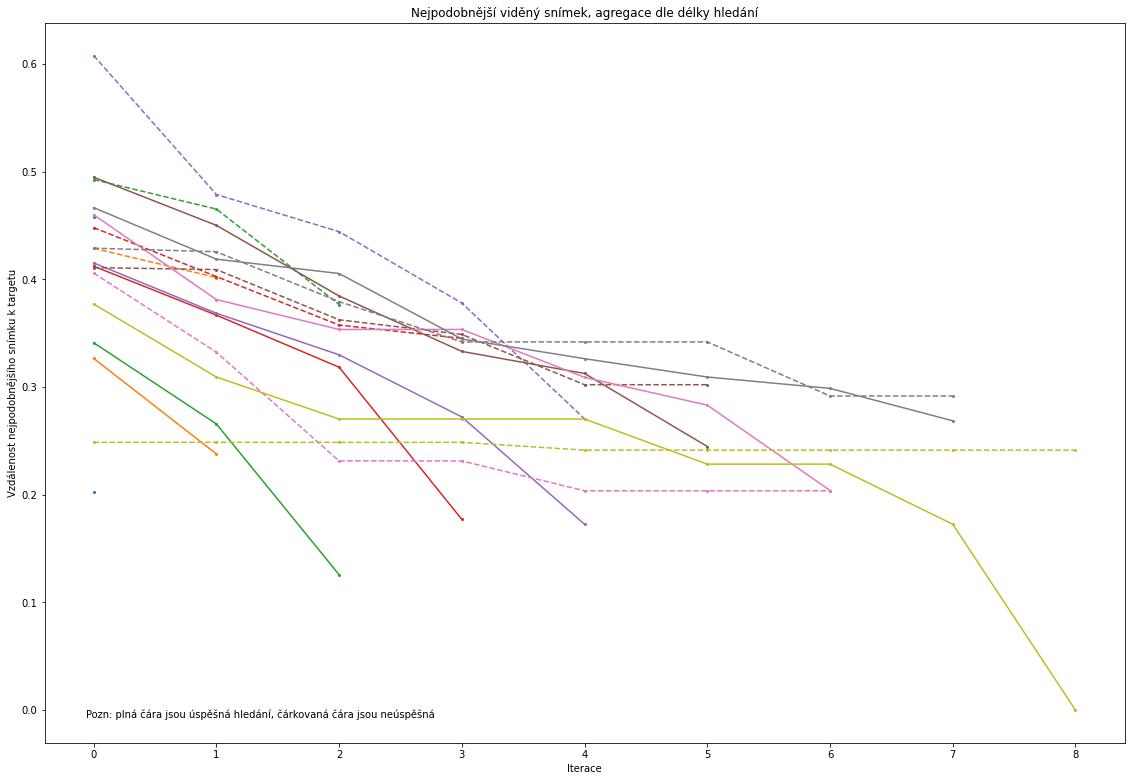

<Figure size 1440x1440 with 0 Axes>

In [3]:
%matplotlib inline
fig, ax = plt.subplots()

succ_results, fail_results = get_cumulatives()
for i in range(MAX_LEN):
    if i == 0:
        continue
    success_pd = pd.DataFrame(succ_results[i]).median(axis=0)
    fail_pd = pd.DataFrame(fail_results[i]).median(axis=0)
    #if success_pd.shape[0] > 0:
    #    plt.subplot(MAX_LEN, 2, (2*i) - 1)
    #    plt.xlim(0, MAX_LEN)
    #    plt.ylim(0, 1)
    line = plt.plot(success_pd.transpose(),linestyle='solid', marker='o', markersize=2)
    #if fail_pd.shape[0] > 0:
    #    plt.subplot(MAX_LEN, 2, (2*i))
    #    plt.xlim(0, MAX_LEN)
    #    plt.ylim(0, 1)
    plt.plot(fail_pd.transpose(), linestyle='dashed', color=line[0].get_color(), marker='o', markersize=2)

plt.figtext(0.5, 0.1, 'Pozn: plná čára jsou úspěšná hledání, čárkovaná čára jsou neúspěšná',
            ha='center', va='center')
plt.title("Nejpodobnější viděný snímek, agregace dle délky hledání")
plt.xlabel('Iterace')
plt.ylabel('Vzdálenost nejpodobnějšího snímku k targetu')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()

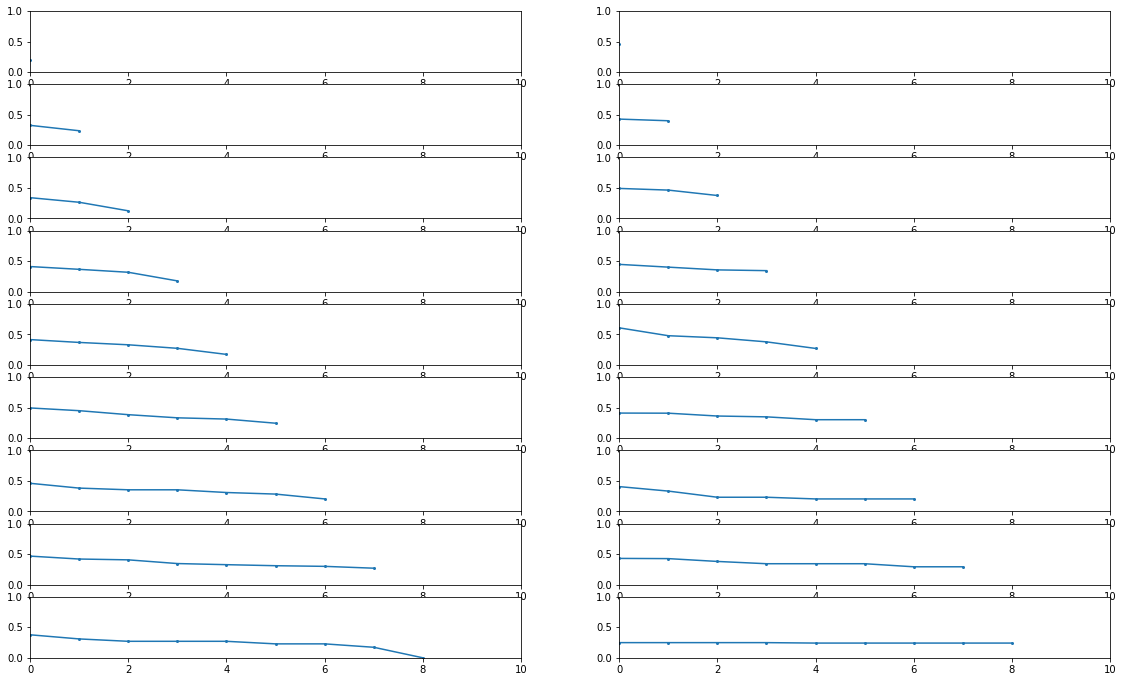

<Figure size 1440x1440 with 0 Axes>

In [4]:
# the same graph split into separate graphs (each curve has its own subgraph)

%matplotlib inline
fig, ax = plt.subplots()

succ_results, fail_results = get_cumulatives()
for i in range(MAX_LEN):
    if i == 0:
        continue
    success_pd = pd.DataFrame(succ_results[i]).median(axis=0)
    fail_pd = pd.DataFrame(fail_results[i]).median(axis=0)
    if success_pd.shape[0] > 0:
        plt.subplot(MAX_LEN, 2, (2*i) - 1)
        plt.xlim(0, MAX_LEN)
        plt.ylim(0, 1)
        plt.plot(success_pd.transpose(),linestyle='solid', marker='o', markersize=2)
    if fail_pd.shape[0] > 0:
        plt.subplot(MAX_LEN, 2, (2*i))
        plt.xlim(0, MAX_LEN)
        plt.ylim(0, 1)
        plt.plot(fail_pd.transpose(), linestyle='solid', marker='o', markersize=2)

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()
